# JatinNanda (https://www.linkedin.com/in/iamjatinnanda)

# Loading the Required Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
pip install yfinance

     |████████████████████████████████| 5.5 MB 4.3 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=b58526cef3d6c97830f8eb5d0249dbcd1ee5bd698038680b947223858cb71f8f
  Stored in directory: /home/jovyan/.cache/pip/wheels/aa/8a/36/59ed4f6fbcb6100967618eeb0696046bf9777a41ac2ff1f9b9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=6faa2abd39df9a96d6caae58ab2fad7bc96c1f4006b86e5453f4cd871a56fec2
  Stored in directory: /home/jovyan/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [69]:
import yfinance as yf
AAPL = yf.download('AAPL','2019-07-14', '2020-07-15')

[*********************100%***********************]  1 of 1 completed


In [70]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-15,51.022499,51.467499,51.000000,51.302502,50.606209,67789600
2019-07-16,51.147499,51.527500,50.875000,51.125000,50.431118,67467200
2019-07-17,51.012501,51.272499,50.817501,50.837502,50.147518,56430000
2019-07-18,51.000000,51.470001,50.924999,51.415001,50.717182,74162400
2019-07-19,51.447498,51.625000,50.590000,50.647499,49.960094,83717200
...,...,...,...,...,...,...
2020-07-08,94.180000,95.375000,94.089996,95.342499,95.170906,117092000
2020-07-09,96.262497,96.317497,94.672501,95.752502,95.580170,125642800
2020-07-10,95.334999,95.980003,94.705002,95.919998,95.747368,90257200


# Visualisaiton of the share 

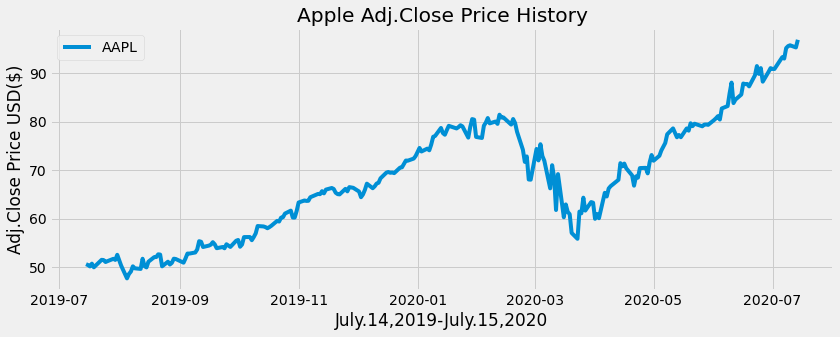

In [74]:
#visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.title('Apple Adj.Close Price History')
plt.xlabel('July.14,2019-July.15,2020')
plt.ylabel('Adj.Close Price USD($)')
plt.legend(loc='upper left')
plt.show()


In [16]:
# Create the simple moving average with 30 day moving window

In [75]:
SMA30 = pd.DataFrame()
SMA30['Adj Close SMA30'] = AAPL['Adj Close'].rolling(window =30).mean()
SMA30

,Adj Close SMA30
Date,
2019-07-15,NaN
2019-07-16,NaN
2019-07-17,NaN
2019-07-18,NaN
2019-07-19,NaN
...,...
2020-07-08,86.661830
2020-07-09,87.201690
2020-07-10,87.745959


In [25]:
#Create simple moving 100 day moving ay average 

In [76]:
SMA100= pd.DataFrame()
SMA100['Adj Close SMA100'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close SMA100
Date,
2019-07-15,NaN
2019-07-16,NaN
2019-07-17,NaN
2019-07-18,NaN
2019-07-19,NaN
...,...
2020-07-08,75.216789
2020-07-09,75.363867
2020-07-10,75.527425


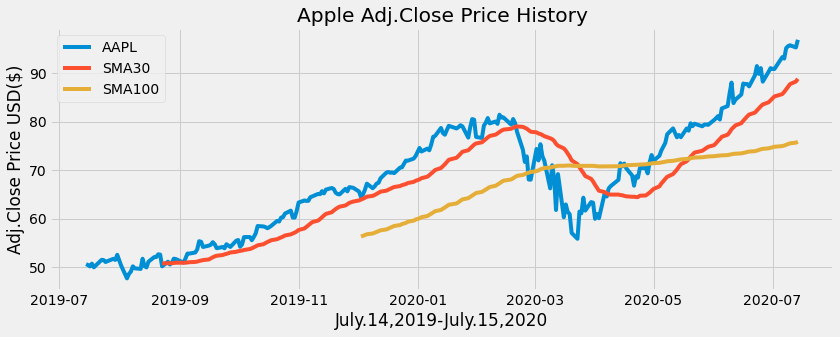

In [77]:
#visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')

plt.plot(SMA30['Adj Close SMA30'], label='SMA30')
plt.plot(SMA100['Adj Close SMA100'], label='SMA100')

plt.title('Apple Adj.Close Price History')
plt.xlabel('July.14,2019-July.15,2020')
plt.ylabel('Adj.Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [17]:
#create a new DtatFrame to store all the data

In [78]:
data= pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close SMA30']
data['SMA100'] = SMA100['Adj Close SMA100']
data

,AAPL,SMA30,SMA100
Date,,,
2019-07-15,50.606209,NaN,NaN
2019-07-16,50.431118,NaN,NaN
2019-07-17,50.147518,NaN,NaN
2019-07-18,50.717182,NaN,NaN
2019-07-19,49.960094,NaN,NaN
...,...,...,...
2020-07-08,95.170906,86.661830,75.216789
2020-07-09,95.580170,87.201690,75.363867
2020-07-10,95.747368,87.745959,75.527425


In [21]:
#CReate a signal to buy and sell

In [79]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell= []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i]> data['SMA100'][i]:
            if flag !=1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag=1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data ['SMA30'][i] < data['SMA100'][i]:
            if flag!=0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
                    
    return (sigPriceBuy, sigPriceSell)

In [33]:
#Store the buy and sell data into the variable

In [80]:
buy_sell= buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price']=  buy_sell[1]

In [81]:
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2019-07-15,50.606209,NaN,NaN,NaN,NaN
2019-07-16,50.431118,NaN,NaN,NaN,NaN
2019-07-17,50.147518,NaN,NaN,NaN,NaN
2019-07-18,50.717182,NaN,NaN,NaN,NaN
2019-07-19,49.960094,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-08,95.170906,86.661830,75.216789,NaN,NaN
2020-07-09,95.580170,87.201690,75.363867,NaN,NaN
2020-07-10,95.747368,87.745959,75.527425,NaN,NaN


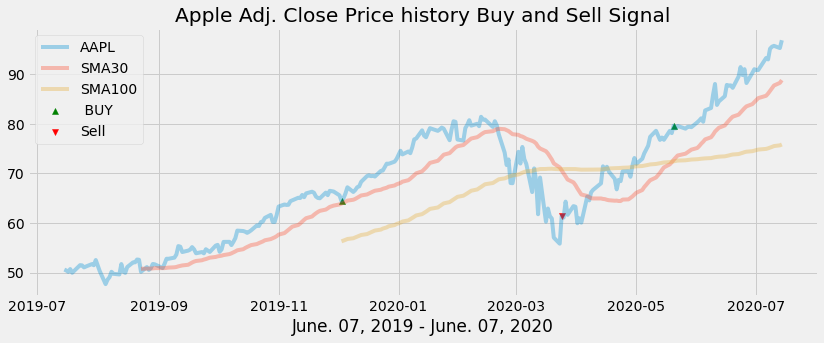

In [82]:
plt.figure(figsize=(12.6,4.6))
plt.plot (data['AAPL'], label = 'AAPL',alpha=0.35)
plt.plot(data['SMA30'], label= 'SMA30',alpha=0.35)
plt.plot(data['SMA100'], label = 'SMA100',alpha=0.35)

plt.scatter(data.index, data['Buy_Signal_Price'], label = ' BUY' ,marker='^', color = 'green')
plt.scatter(data.index,data['Sell_Signal_Price'],label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price history Buy and Sell Signal')
plt.xlabel('June. 07, 2019 - June. 07, 2020')
plt.legend(loc='upper left')
plt.show()